# Polynomial Regression

**Polynomial regression** is a form of regression analysis in which the relationship between the independent variable *x* and the dependent variable *y* is modelled as an **nth degree polynomial in x**. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y.

In the real world, not all data fits into a linear model. So, for generating a line to best represents the data, we use polynomial regression.

- f( x )  =  c0 + c1x + c2x^2 ... cn x^n

(**n** is the degree of the polynomial and **c** is a set of coefficients.)

## Importing libraries

In [14]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Loading dataset

**Dataset:** https://www.kaggle.com/datasets/farhanmd29/position-salaries

This dataset shows job positions, their level, and their salaries. We are going to explore the relationship between the level and the salaries. The columns are as follows:

- Position
- Level 
- Salary 

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


It contains 10 rows and 3 columns

In [4]:
dataset.shape

(10, 3)

We will use the second column (which is Level) as the independent variable (x) and the last column (the Salary) as the dependent variable (y).

In [5]:
X = dataset.iloc[:, 1:-1].values  #Level
y = dataset.iloc[:, -1].values    #Salary 

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Apply Linear Regression on Whole Data

First, we will create a Linear Regression model and compare it with Polynomial Regression Model 

In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Apply Polynomial Regression on Whole Data

We are creating our Polynomial Regression model with degree 2

In [9]:
poly_regressor = PolynomialFeatures(degree = 2)
X_poly = poly_regressor.fit_transform(X)
linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Visualize Linear Regression Results

As seen below, the Linear Regression line is not good enough to represent the data

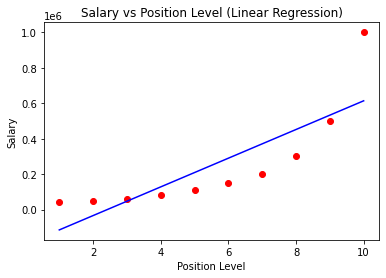

In [10]:
plt.scatter(X, y, color = 'red')  # real observations
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Salary vs Position Level (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualize Polynomial Regression Results


The Polynomial Regression fits most of the observations in the data

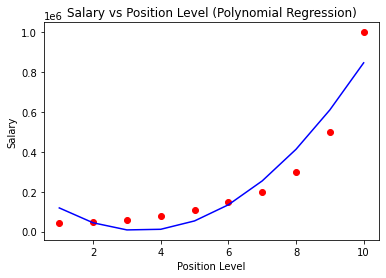

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_reg.predict(poly_regressor.fit_transform(X)), color = 'blue')
plt.title('Salary vs Position Level (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predict with Linear Regression

In [12]:
regressor.predict([[6.5]])

array([330378.78787879])

## Predict with Polynomial Regression

In [13]:
linear_reg.predict(poly_regressor.fit_transform([[6.5]]))

array([189498.10606061])